## KoNLPy
* NLTK는 영어 정보처리를 위한 패키지
* 반면, KoNLPy는 한국어 정보처리를 위한 패키지
* 이미 개발된 한글 형태소 분석기들을 파이썬에서도 사용할 수 있도록 해주는 도우미(Wrapper) 패키지
    + hannanum, kkma, komoran, mecab, Okt(twitter)
* konlpy.org/ko
* pip install konlpy
* pip install tweepy==3.10.0

In [6]:
# ! pip install konlpy
# ! pip install tweepy==3.10.0

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import konlpy
from konlpy.tag import Okt

In [2]:
# 트위터 형태소 사전을 사용하기 위한 초기화
twitter = Okt()

txt1 = '아버지가방에들어가신다'
txt2 = '아버지가 방에 들어가신다.'
txt3 = '또 올라? 치킨이 2만원... 소비자에 비용상승 전가'


In [3]:
# 형태소 분석 : pos(객체명)
twitter.pos(txt1)
twitter.pos(txt2)
twitter.pos(txt3)

[('또', 'Noun'),
 ('올라', 'Verb'),
 ('?', 'Punctuation'),
 ('치킨', 'Noun'),
 ('이', 'Josa'),
 ('2만원', 'Number'),
 ('...', 'Punctuation'),
 ('소비자', 'Noun'),
 ('에', 'Josa'),
 ('비용', 'Noun'),
 ('상승', 'Noun'),
 ('전가', 'Noun')]

In [6]:
# 형태소 상세 분석 (어간추출 stemming): morphs(객체명, stem=True)
twitter.morphs(txt1, stem=True)
twitter.morphs(txt2, stem=True)
twitter.morphs(txt2, stem=True)

['아버지', '가', '방', '에', '들어가다', '.']

In [9]:
twitter.morphs(txt3)

['또', '올라', '?', '치킨', '이', '2만원', '...', '소비자', '에', '비용', '상승', '전가']

In [11]:
# 명사 추출 : nouns(객체명)
twitter.nouns(txt1)

['아버지', '가방']

In [12]:
twitter.nouns(txt2)

['아버지', '방']

In [13]:
twitter.nouns(txt3)

['또', '치킨', '소비자', '비용', '상승', '전가']

In [38]:
# konlpy 내장 한국어 말뭉치
# 대한민국 헌법 맒뭉치 : kolaw
# 국회 법안 말뭉치 : kobill
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [39]:
kolaw.fileids()  # 말뭉치 파일명 출력

['constitution.txt']

In [40]:
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [41]:
# 내장 말뭉치 확인 
docs = kolaw.open('constitution.txt').read()
docs[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [42]:
# 대한민국 헌법 말뭉치에서 자주 언급되는 단어 분석
from collections import Counter

words = twitter.nouns(docs) # 형태소 중 명사만 추출
words[:10]

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

In [43]:
wc = Counter(words)  # 단어별 빈도 분석
wc.most_common(25)

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55),
 ('헌법', 53),
 ('그', 47),
 ('이', 38),
 ('모든', 37),
 ('바', 37),
 ('위', 36),
 ('기타', 26),
 ('및', 25),
 ('사항', 23),
 ('권리', 21),
 ('안', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20)]

In [44]:
# 추출된 명사에서 2자이상만을 다시 추출해서 단어 빈도를 분석
tokens = twitter.nouns(docs)
words = [t for t in tokens if len(t) >= 2] 

In [45]:
wc = Counter(words)
wc.most_common(25)

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20),
 ('직무', 19),
 ('국무총리', 19),
 ('경제', 18),
 ('의무', 18),
 ('조직', 18),
 ('국회의원', 18),
 ('임기', 18),
 ('의결', 17),
 ('공무원', 17),
 ('경우', 17)]

In [47]:
# 대한민국 한법 말뭉치를 이용해서 워드클라우드로 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wcc = dict(wc.most_common())

In [48]:
korfont = '/usr/shar/fonts/NanumGothic.ttf'

(-0.5, 639.5, 399.5, -0.5)

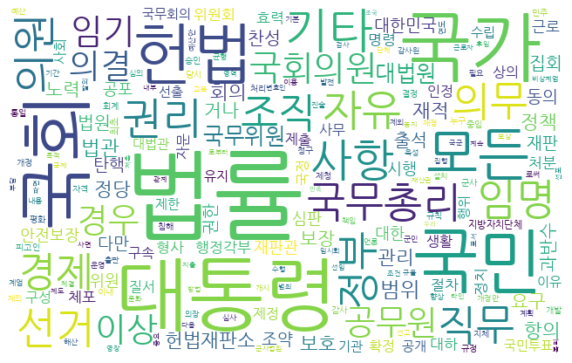

In [49]:
wcimg = WordCloud(background_color='white', width=640, height=400, font_path=korfont).generate_from_frequencies(wcc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation = 'bilinear')
plt.axis('off')

In [51]:
# 트럼프 국회연설문을 워드클라우드로 시각화
docs1 = []
with open('csv/trump_ko.txt') as f :
    docs1 = f.read()
docs1[:100]

'정세균 의장님, 존경하는 국회의원 여러분, 내외귀빈 여러분.\n\n미국 국민을 대표해 이 곳 국회 본회의장에서 대한민국 국민들께 연설할 수 있는 특별한 영광을 주셔서 감사합니다.\n\n한'

In [ ]:
nouns1 = twitter.nouns(docs1)

In [54]:
words1 = [n for n in nouns1 if len(n) >= 2]

In [62]:
wc = Counter(words1)
wcc = dict(wc.most_common())

(-0.5, 639.5, 479.5, -0.5)

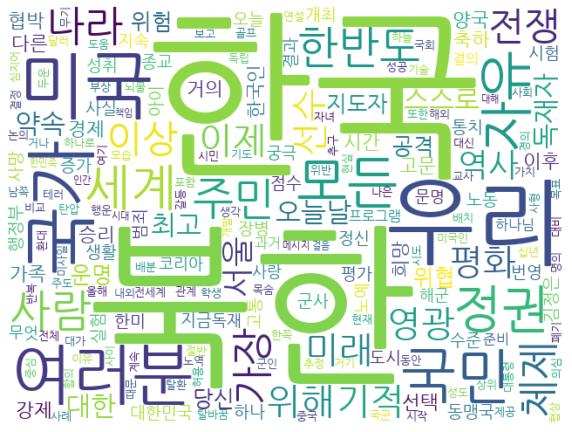

In [64]:
wcimg = WordCloud(background_color='white', width=640, height=480, font_path=korfont).generate_from_frequencies(wcc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')

In [65]:
# 스티브잡스 졸업축사를 워드클라우드로 시각화
docs = []
with open('csv/stevejobs_ko.txt') as f:
    docs2= f.read()
docs2[:100]

'오늘 세계 최고 대학 중 한 곳의 졸업식에 참석하게 되어 영광입니다. 나는 대학을 졸업한 적이 없습니다. 솔직히 오늘이 대학 졸업식에 가장 근접해본 것입니다. 오늘 저는 내 인생의'

In [67]:
nouns2 = twitter.nouns(docs2)
words2 = [n for n in nouns2 if len(n) >= 2]

In [70]:
wc = Counter(words2)
wcc = dict(wc.most_common())

(-0.5, 639.5, 479.5, -0.5)

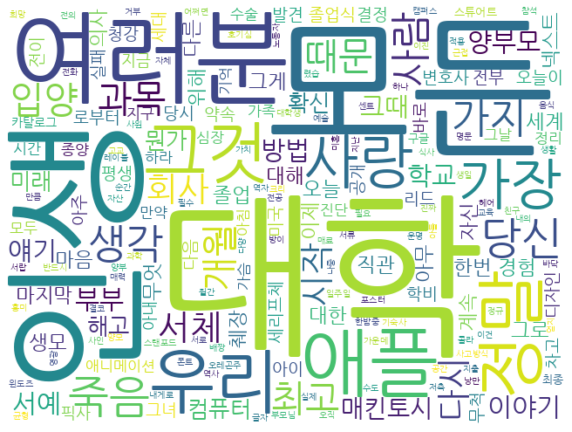

In [71]:
wcimg = WordCloud(background_color='white', width=640, height=480, font_path=korfont).generate_from_frequencies(wcc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')